This assigment has the purpose of solving the maximazition problem for given patameters. 

We firstly import the relevant packages, that are relevant for the execution of the following assignment. 

In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib import cm # for colormaps

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

1) solving equation 1

In [2]:
# defining parameters
w = 1
m = 1 
v = 10 

tau0 = 0.4 
tau1 = 0.1 
kappa = 0.4
epsilon = 0.3 

In [3]:
#First and foremost, we define the utility and budget constraint fot the given parameteres. 
def utility(c,l): #The utility function, as a function of c and l 
    u = np.log(c)-v*l**(1+1/epsilon)/(1+1/epsilon)
    return u 

#Defining the budget constraint
def budget(l,w):
    x = m + w*l-[tau0*w*l+tau1*np.max(w*l-kappa,0)]
    return x

#We define the equality, that we wish to minimize. 
def equality(l,w):
    c = budget(l,w)
    return -utility(c,l)

In [4]:
#We are now interested in minimizing "equality"

opt=optimize.minimize(equality, x0=10, args=(w))
print(opt.message)
l_opt = opt.x
c_opt = budget(l_opt,w)
u_optimal = utility(c_opt,l_opt)

Optimization terminated successfully.


In [5]:
#the results can now be printed and the optimal

print(f'Optimal labour supply: {l_opt}')
print(f'Optimal consumption: {c_opt}')
print(f'Utility: {u_optimal}')

Optimal labour supply: [0.38246279]
Optimal consumption: [[1.2312314]]
Utility: [[0.17217235]]


2) Plot l_opt and c_opt in the range 0.5 to 1.5

In [7]:
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

N=10000
w_ = np.linspace(0.5,1.5,N)
l_ = np.empty(N)
c_ = np.empty(N)

for j,w in enumerate(w_):
    opt = optimize.minimize(equality, x0=10, args=(w))
    l_[j] = opt.x
    c_[j] = budget(l_[j],w)

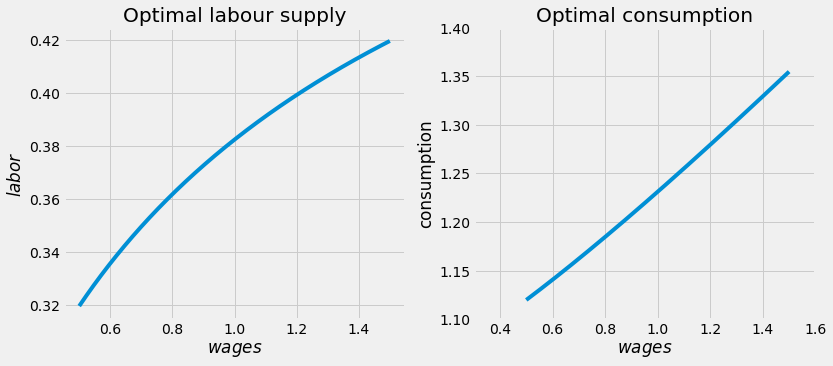

In [8]:
#We can now illustrate the plot. In the following code, we specify the colours and grid formats. 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,5))

#The first plot: Labor as a function of wage
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_,l_)

#setting the title and labbeling the axis. 
ax_left.set_title('Optimal labour supply')
ax_left.set_xlabel('$wages$')
ax_left.set_ylabel('$labor$')
ax_left.grid(True)

#The second plot: consumption as a function of wage
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_, c_)

#setting the title and labbeling the axis. 
ax_right.set_title('Optimal consumption')
ax_right.set_xlabel('$wages$')
ax_right.set_ylabel('consumption')
ax_right.grid(True)
plt.ylim((1.10,1.4))
plt.xlim((0.3,1.6))

plt.show()

3) Calculation of the tax revenue

In [10]:
#We consider a popultion of N=10.000 indexed by i. We assume that a given wage sample are uniformly distributed.
#We define the tax revenue function which is stated in the project description


def taxrevenue(kappa, tau0, tau1, l_,w_):
    revenue = np.sum(tau0*w_*l_ + tau1*np.max(w_*l_- kappa,0))
    return revenue 
print(taxrevenue(kappa, tau0, tau1, l_,w_))

1775.391450133231


Given the parameteres and the earlier calculated values, the tax-revenue is eqaul to 1775.3 

4) What is the taxrevenue when $\epsilon$=0.1?

In [12]:
#We redefine de values for l and c, given the fact that the value of epsilon has a effect through these variables. 

epsilon=0.1
l_new=np.empty(N)
for j,w in enumerate(w_):
    opt = optimize.minimize(equality, x0=10, args=(w))
    l_new[j] = opt.x
    c_[j] = budget(l_[j],w)
print(taxrevenue(w_,l_new,tau0,tau1,kappa))

-1554.4686299458606


For the new value of epsilon, it is evident that the taxrevenue turns negative. The taxrevenue is now -1554.46.